In [40]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

SAVE_PLOTS=True

cs137_path = r'data\sipm_spectroscopy\vp2ps_20250314-163145_Cs137_preliminary_10mins.csv'
na22_path = r'data\sipm_spectroscopy\vp2ps_20250314-174907_Na22_preliminary_10mins.csv'
co60_path = r'data\sipm_spectroscopy\vp2ps_20250314-193001_Co60.csv'

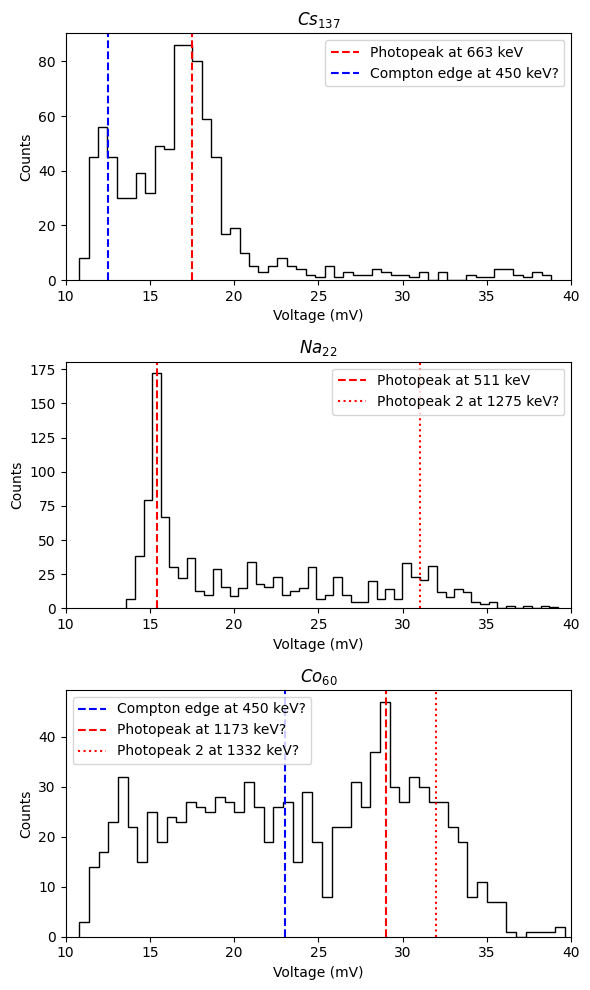

In [ ]:

cs137 = pd.read_csv(cs137_path)
na22 = pd.read_csv(na22_path)
co60 = pd.read_csv(co60_path)

def process_df(df):
    V_min = 1 #mV
    V_max = 40 #mV
    df['mV'] = df['V']*1000
    df = df[(df['mV'] > V_min) & (df['mV'] < V_max)]
    return df

cs137 = process_df(cs137)
na22 = process_df(na22)
co60 = process_df(co60)

fig, ax = plt.subplots(3, 1, figsize=(6, 10))

nbins = 50

ax[0].hist(cs137['mV'], bins=nbins, histtype='step', color ='black')
ax[0].set_title(r'$Cs_{137}$')
# draw vertical line at 662 keV
ax[0].axvline(x=17.5, color='r', linestyle='--', label='Photopeak at 663 keV')
ax[0].axvline(x=12.5, color='b', linestyle='--', label='Compton edge at 450 keV?')

ax[1].hist(na22['mV'], bins=nbins, histtype='step', color ='black')
ax[1].set_title(r'$Na_{22}$')

ax[1].axvline(x=15.4, color='r', linestyle='--', label='Photopeak at 511 keV')
ax[1].axvline(x=31.0, color='r', linestyle='dotted', label='Photopeak 2 at 1275 keV?')

ax[2].hist(co60['mV'], bins=nbins, histtype='step', color ='black')
ax[2].set_title(r'$Co_{60}$')
ax[2].axvline(x=23, color='b', linestyle='--', label='Compton edge at 963 keV?')
ax[2].axvline(x=29, color='r', linestyle='--', label='Photopeak at 1173 keV?')
ax[2].axvline(x=32.0, color='r', linestyle='dotted', label='Photopeak 2 at 1332 keV?')



for a in ax:
    a.legend()
    a.set_xlabel('Voltage (mV)')
    a.set_ylabel('Counts')
    # set x range from 5 to 40 mV
    a.set_xlim(10, 40)
plt.tight_layout()
if SAVE_PLOTS:
    plt.savefig('plots/sipm_spectroscopy/preliminary_10min_guesses.png')
plt.show()

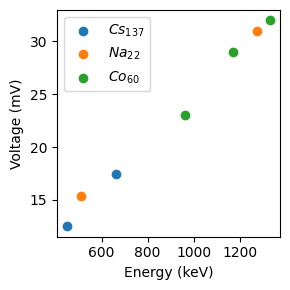

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3, 3))

cs137_compton_V = 12.5
cs137_compton_kev = 450

cs137_photopeak_V = 17.5
cs137_photopeak_kev= 662

na22_photopeak_V = 15.4
na22_photopeak_kev = 511
na22_photopeak2_V = 31.0
na22_photopeak2_kev = 1275

co60_compton_V = 23
co60_compton_kev = 963
co60_photopeak_V = 29
co60_photopeak_kev = 1173
co60_photopeak2_V = 32
co60_photopeak2_kev = 1332

# plot kev vs V
ax.scatter([cs137_compton_kev, cs137_photopeak_kev], [cs137_compton_V, cs137_photopeak_V], label=r'$Cs_{137}$', color = 'red')
ax.scatter([na22_photopeak_kev, na22_photopeak2_kev], [na22_photopeak_V, na22_photopeak2_V], label=r'$Na_{22}$', color='blue')
ax.scatter([co60_compton_kev, co60_photopeak_kev, co60_photopeak2_kev], [co60_compton_V, co60_photopeak_V, co60_photopeak2_V], label=r'$Co_{60}$', color = 'green')

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Voltage (mV)')
ax.legend()
plt.tight_layout()
if SAVE_PLOTS:
    plt.savefig('plots/sipm_spectroscopy/kev_vs_V.png')
